In [1]:
import numpy
import os
from dotenv import load_dotenv
import requests
from IPython.display import Image
import json
import random


In [2]:
load_dotenv()
api_key = os.getenv("KEY_API_MAPS")

In [13]:
list1 = ["Pl. des Anciens-Fossés 6, 1814 La Tour-de-Peilz","Av. de l'Ile-Heureuse 23, 1800 Vevey","Av. du Général-Guisan 41, 1800 Vevey","Chem. du Petit-Centenaire 6, 1802 Corseaux"]
list2 = ["Rue d'Entre-deux-Villes 8, 1814 La Tour-de-Peilz", "Av. de Traménaz 46, 1814 La Tour-de-Peilz","Rte de Blonay 94, 1814 La Tour-de-Peilz"]
list3 = ["40.737102,-73.990318","40.749825,-73.987963","40.752946,-73.987384","40.755823,-73.986397"]
list4 = ["40.727102,-73.990318","40.739825,-73.977963","40.742946,-73.977384","40.745823,-73.976397"]
list5 = ["Rue de la Madeleine 17, 1800 Vevey", "Rue des Moulins 17, 1800 Vevey", "Chem. Emile-Javelle 2, 1800 Vevey", "Rte de Saint-Légier 11, 1800 Vevey"]
list6 = ["Rue de la Madeleine 17, 1800 Vevey","Rue du Simplon 28, 1800 Vevey", "Av. du Général-Guisan 1, 1800 Vevey"]

shuttles = [list5,list6]

In [4]:
### Function to give a list of directions to follow to go from origin to destination
# Inputs:   origin: a string with the localisation point of the origin
#           destination: a string with the localisation point of the destination
#           key: the maps api key
# Output:   a string of different steps to follow to go from origin to destination

def fct_dir(origin, destination, key):
    url = f'https://maps.googleapis.com/maps/api/directions/json'\
    f'?origin={origin}'\
    f'&destination={destination}'\
    f'&key={key}'

    payload={}
    headers = {}

    response = requests.request("GET", url, headers=headers, data=payload)

    direction_dict = json.loads(response.text)

    lat = direction_dict["routes"][0]["legs"][0]["start_location"]["lat"]
    long = direction_dict["routes"][0]["legs"][0]["start_location"]["lng"]

    travel_list = [str(f'{lat},{long}')]

    for l in direction_dict["routes"][0]["legs"][0]["steps"]:
        lat= l["end_location"]["lat"]
        long = l["end_location"]["lng"]
        tmp = f'{lat},{long}'
        travel_list.append(str(tmp))

    travel_list = "|".join(travel_list) 

    return(travel_list)

In [5]:
### Funtion to create the path between all localisation points of a list
# Inputs:   list: a list of strings with location points 
#           key: the maps api key
# Outputs:  a string with the path to follow

def fct_give_parcours(list, color, key):
    parcours = []

    for i in range(len(list)):
        tmp = fct_dir(list[i%len(list)], list[(i+1)%len(list)], api_key)
        parcours.append(tmp)

    parcours = "|".join(parcours) 

    #color = "0x"+''.join([random.choice('ABCDEF0123456789') for i in range(6)])

    travel_list = f'&path=color:{color}|weight:5|{parcours}'

    return(travel_list)

In [6]:
### Function to create a map with the localisations and path to follow
# Inputs:   shuttles: a list of lists with strings of loaclisation points to visit
#           paths: a string with the path to follow
#           key: the maps api key
# Output:   A map with the localisations to visit (numbered from 0 (start)), and the path in a random color

def fct_maps(shuttles, paths, key):

    labels_list = ""

    colors = ["blue","red","green","orange", "purple","brown","black"]
    c=0
    
    for s in shuttles:
        s_int = range(len(s))

        labels_s = ""
        for i in s_int:
            labels_s = labels_s + "&markers=size:mid%7Ccolor:"+colors[c]+"%7Clabel:" + str(i) + "%7C" + str(s[i])
        
        labels_list = labels_list + labels_s
        c+=1
    
        

    url = f'https://maps.googleapis.com/maps/api/staticmap'\
        f'?size=400x400'\
        f'{labels_list}'\
        f'{paths}'\
        f'&key={key}'

    payload = {}
    headers = {}

    response = requests.request("GET", url, headers=headers, data=payload)
    
    return Image(response.content)   

In [11]:
### Function to run the whole algorithm
# Inputs:   shuttles: a list of lists with strings of loaclisation points to visit
#           key: the maps api key
# Output:   A map with the localisations to visit (numbered from 0 (start)), and the path in a random color

def fct_run_maps(shuttles, key):

    paths = ""

    colors = ["blue","red","green","orange", "purple","brown","black"]
    c=0

    for s in shuttles:
        paths = paths + fct_give_parcours(s, colors[c], key)
        c+=1

    return(fct_maps(shuttles, paths, key))


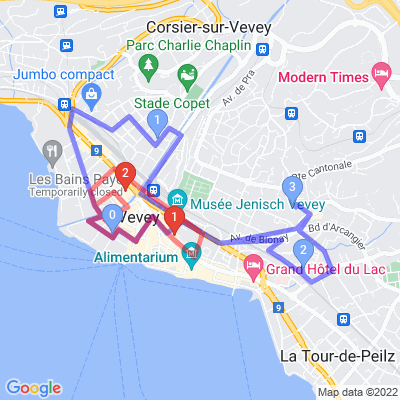

In [14]:
fct_run_maps(shuttles, api_key)

In [9]:
### Early stage function to have a simple map
# Inputs:   list_loc: a list of strings with the localisation points to visit
#           key: the maps api key
# Output:   A map with the localisations to visit (numbered from 0 (start)), linked by a red trait line

def fct_simple_maps(list_loc, key):
    i_list = range(len(list_loc))
    list_loc.append(list_loc[0])
    localisations1 = "|".join(list_loc)  

    labels = str()
    for i in i_list:
        labels = labels + "&markers=size:mid%7Ccolor:red%7Clabel:" + str(i) + "%7C" + str(list_loc[i])

    url = f'https://maps.googleapis.com/maps/api/staticmap'\
        f'?size=400x400'\
        f'{labels}'\
        f'&path=color:red|weight:5|{localisations1}'\
        f'&key={key}'

    payload = {}
    headers = {}

    response = requests.request("GET", url, headers=headers, data=payload)
    
    return Image(response.content)   

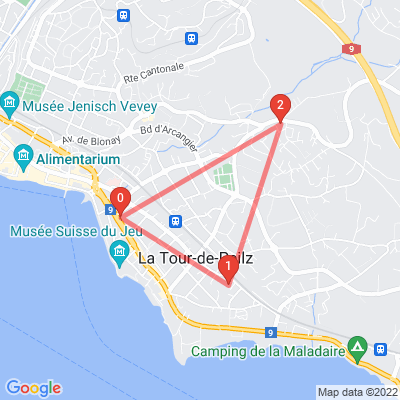

In [10]:
fct_simple_maps(list2, api_key)